In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning
import pickle
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import SMOTE

In [ ]:
#importing dataset
heart_d =pd.read_csv('C:/Users/OneDrive/Desktop/Heart/heart.csv')
#basic info for datasets to check whether the datasets are imported properly
print("Dataset Information:")
heart_d.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [34]:
#Display the first few rows of dataset     
heart_d.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


In [35]:
#description about dataset
heart_d.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [36]:
heart_d.shape

(1000, 14)

In [37]:
#checking null values
heart_d.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [38]:
#calculates the number of non-missing (valid) values in each column of the DataFrame
heart_d.notnull().sum()

patientid            1000
age                  1000
gender               1000
chestpain            1000
restingBP            1000
serumcholestrol      1000
fastingbloodsugar    1000
restingrelectro      1000
maxheartrate         1000
exerciseangia        1000
oldpeak              1000
slope                1000
noofmajorvessels     1000
target               1000
dtype: int64

In [39]:
#datatypes used in heart
heart_d.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

In [40]:
# Check for duplicate rows
duplicates = heart_d.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    heart_d = heart_d.drop_duplicates()
    print("Duplicate rows removed.")


Number of duplicate rows: 0


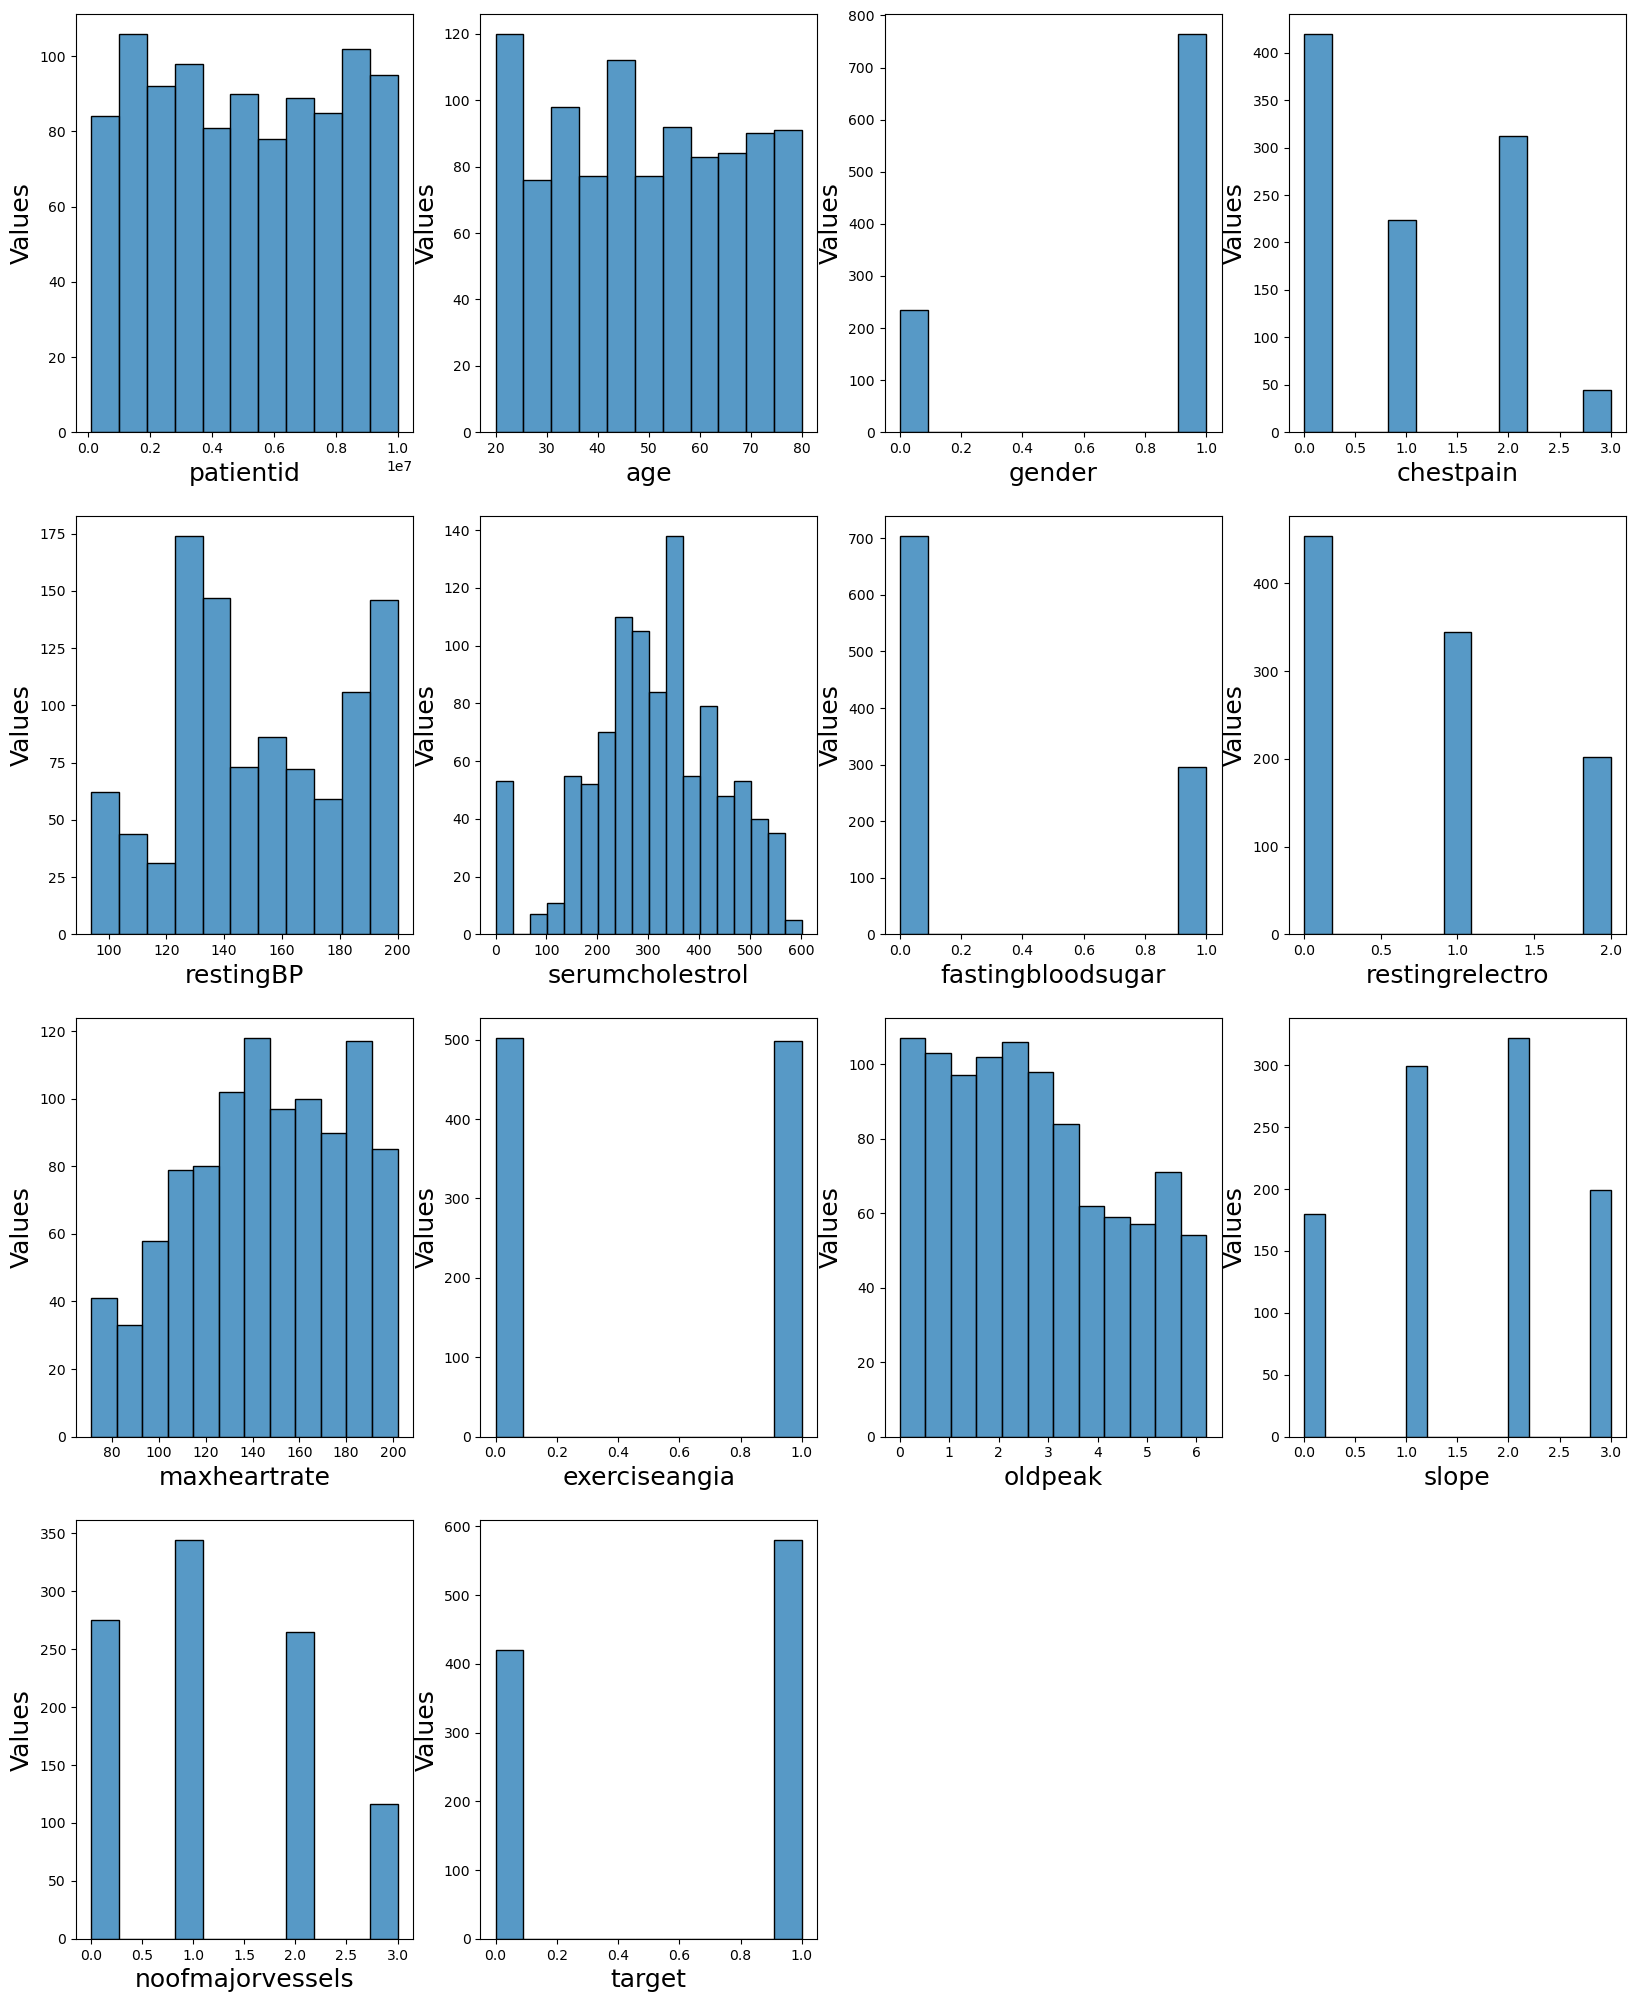

In [41]:
#Plotting the distribution plot.
plt.figure(figsize=(20,25))
plotnumber=1

for column in heart_d:
    if plotnumber<16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(heart_d[column])
        plt.xlabel(column,fontsize=18)
        plt.ylabel('Values',fontsize=18)
    plotnumber+=1
plt.show()

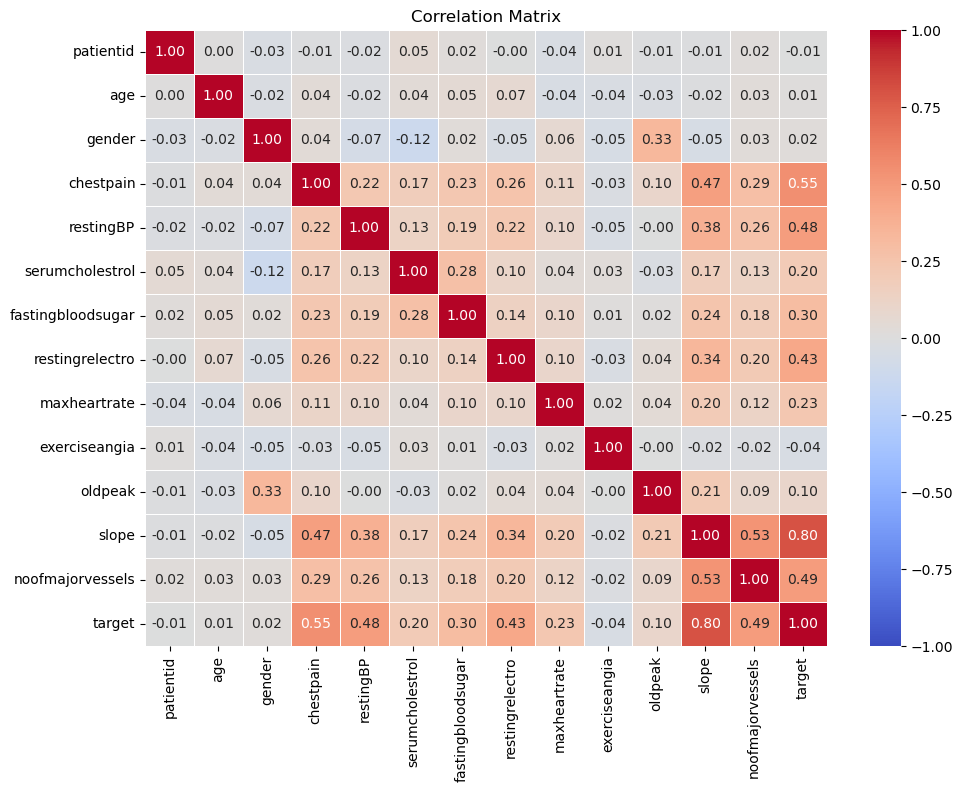

In [42]:
# Calculate the correlation matrix
correlation_matrix = heart_d.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [43]:
#check missing value
print(heart_d.isnull().sum())  # Count missing values per column
print(heart_d.isnull().mean() * 100)  # Percentage of missing values per column


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64
patientid            0.0
age                  0.0
gender               0.0
chestpain            0.0
restingBP            0.0
serumcholestrol      0.0
fastingbloodsugar    0.0
restingrelectro      0.0
maxheartrate         0.0
exerciseangia        0.0
oldpeak              0.0
slope                0.0
noofmajorvessels     0.0
target               0.0
dtype: float64


In [44]:
#checking the variance
heart_d.var()

patientid            8.386263e+12
age                  3.191486e+02
gender               1.799550e-01
chestpain            9.085085e-01
restingBP            8.979149e+02
serumcholestrol      1.754136e+04
fastingbloodsugar    2.085926e-01
restingrelectro      5.930891e-01
maxheartrate         1.168974e+03
exerciseangia        2.502462e-01
oldpeak              2.960992e+00
slope                1.007407e+00
noofmajorvessels     9.556717e-01
target               2.438438e-01
dtype: float64

In [45]:
#dropping irrelevant feature(patientid)
heart_d = heart_d.drop(columns=['patientid'])
# Check if patientid is dropped
print(heart_d.columns)

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')


In [46]:
#Defining numerical and categorical columns
numerical_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
categorical_cols = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 
                    'exerciseangia', 'slope', 'noofmajorvessels']
x = heart_d[numerical_cols + categorical_cols]

In [47]:
# Logistic Regression requires scaled numerical features
scaler = StandardScaler()  # For numerical scaling
encoder = OneHotEncoder()  # For one-hot encoding categorical variables

In [48]:
# Scale numerical columns and encode categorical columns
x_scaled_num = scaler.fit_transform(x[numerical_cols])  # Scale numerical columns
x_encoded_cat = encoder.fit_transform(x[categorical_cols]).toarray()  # Encode categorical columns


In [49]:
# Combine scaled numerical and encoded categorical features
x_logistic = pd.DataFrame(x_scaled_num, columns=numerical_cols)  # DataFrame for scaled numerical data
x_logistic = pd.concat(
    [x_logistic, pd.DataFrame(x_encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)  # Concatenate scaled and encoded data for Logistic Regression

In [50]:
# Random Forest does not require scaling but does need encoded categorical features
x_rf = pd.concat(
    [x[numerical_cols], pd.DataFrame(x_encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)  # Combine raw numerical and encoded categorical data

In [51]:
#'target' is the target column
y = heart_d['target']
x_logistic = heart_d.drop('target', axis=1)  # Features for logistic model
x_rf = heart_d.drop('target', axis=1)        # Features for random forest

# Split Data into Train, Validation, and Test Sets
x_train_log, x_temp_log, y_train_log, y_temp_log = train_test_split(x_logistic, y, test_size=0.2, random_state=42)
x_val_log, x_test_log, y_val_log, y_test_log = train_test_split(x_temp_log, y_temp_log, test_size=0.5, random_state=42)

x_train_rf, x_temp_rf, y_train_rf, y_temp_rf = train_test_split(x_rf, y, test_size=0.2, random_state=42)
x_val_rf, x_test_rf, y_val_rf, y_test_rf = train_test_split(x_temp_rf, y_temp_rf, test_size=0.5, random_state=42)


In [52]:
# Training and Evaluatating Logistic Regression
print("Training Logistic Regression...")
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter to ensure convergence
log_reg_model.fit(x_train_log, y_train_log)  # Train the model

# Validate the Logistic Regression model
log_reg_val_predictions = log_reg_model.predict(x_val_log)
print("Logistic Regression Validation Performance:")
print("Accuracy on validation data:", accuracy_score(y_val_log, log_reg_val_predictions))
print("Classification Report:\n", classification_report(y_val_log, log_reg_val_predictions))

# Test the Logistic Regression model
log_reg_test_predictions = log_reg_model.predict(x_test_log)
print("Logistic Regression Test Performance:")
print("Accuracy on test data:", accuracy_score(y_test_log, log_reg_test_predictions))
print("Classification Report:\n", classification_report(y_test_log, log_reg_test_predictions))


Training Logistic Regression...
Logistic Regression Validation Performance:
Accuracy on validation data: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.97      0.98        62

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Logistic Regression Test Performance:
Accuracy on test data: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.95      0.98      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [53]:
# Training and Evaluatating Random Forest
print("Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Use 100 trees for the forest
rf_model.fit(x_train_rf, y_train_rf)  # Train the model

# Validate the Random Forest model
rf_val_predictions = rf_model.predict(x_val_rf)
print("Random Forest Validation Performance:")
print("Accuracy on validation data:", accuracy_score(y_val_rf, rf_val_predictions))
print("Classification Report:\n", classification_report(y_val_rf, rf_val_predictions))

# Test the Random Forest model
rf_test_predictions = rf_model.predict(x_test_rf)
print("Random Forest Test Performance:")
print("Accuracy on test data:", accuracy_score(y_test_rf, rf_test_predictions))
print("Classification Report:\n", classification_report(y_test_rf, rf_test_predictions))

Training Random Forest...
Random Forest Validation Performance:
Accuracy on validation data: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        62

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Random Forest Test Performance:
Accuracy on test data: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [54]:
# Avoid Overfitting with Random Forest
# Check feature importance
print("Feature Importance from Random Forest:")
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': x_rf.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Feature Importance from Random Forest:
              Feature  Importance
10              slope    0.391280
2           chestpain    0.133784
3           restingBP    0.127660
11   noofmajorvessels    0.081258
4     serumcholestrol    0.076698
7        maxheartrate    0.043941
6     restingrelectro    0.036623
9             oldpeak    0.032776
1              gender    0.025267
5   fastingbloodsugar    0.024643
0                 age    0.023081
8       exerciseangia    0.002989


In [55]:

# Define valid parameter combinations
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'max_iter': [100, 500, 1000]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', None], 'solver': ['saga'], 'max_iter': [100, 500, 1000]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [100, 500, 1000]}
]

# Create Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Perform GridSearchCV
log_reg_grid_search = GridSearchCV(
    log_reg, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1,
    error_score='raise'  # Raise errors to debug issues
)

try:
    log_reg_grid_search.fit(x_train_log, y_train_log)

    # Best parameters and best model
    print("Best Parameters:", log_reg_grid_search.best_params_)
    best_log_reg = log_reg_grid_search.best_estimator_

    # Validate the best model
    log_reg_val_predictions = best_log_reg.predict(x_val_log)
    print("Logistic Regression Validation Performance:")
    print("Accuracy on validation data:", accuracy_score(y_val_log, log_reg_val_predictions))
    print("Classification Report:\n", classification_report(y_val_log, log_reg_val_predictions))

    # Test the best model
    log_reg_test_predictions = best_log_reg.predict(x_test_log)
    print("Logistic Regression Test Performance:")
    print("Accuracy on test data:", accuracy_score(y_test_log, log_reg_test_predictions))
    print("Classification Report:\n", classification_report(y_test_log, log_reg_test_predictions))

except Exception as e:
    print("Error occurred:", str(e))


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Validation Performance:
Accuracy on validation data: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      0.98      0.98        62

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Logistic Regression Test Performance:
Accuracy on test data: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.95      0.98      0.96        55

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [56]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth (None means full depth)
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when splitting
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
rf_grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# Train the model
print("Training Random Forest with Hyperparameter Tuning...")
rf_grid_search.fit(x_train_rf, y_train_rf)

# Best parameters and best model
print("Best Parameters:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_

# Validate the best model
rf_val_predictions = best_rf_model.predict(x_val_rf)
print("Random Forest Validation Performance:")
print("Accuracy on validation data:", accuracy_score(y_val_rf, rf_val_predictions))
print("Classification Report:\n", classification_report(y_val_rf, rf_val_predictions))

# Test the best model
rf_test_predictions = best_rf_model.predict(x_test_rf)
print("Random Forest Test Performance:")
print("Accuracy on test data:", accuracy_score(y_test_rf, rf_test_predictions))
print("Classification Report:\n", classification_report(y_test_rf, rf_test_predictions))


Training Random Forest with Hyperparameter Tuning...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Validation Performance:
Accuracy on validation data: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        62

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Random Forest Test Performance:
Accuracy on test data: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        55

    accuracy                           0.99       100
   macro avg

In [57]:
# Load the saved model
with open('heart_disease_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Check expected number of features
print(f"Model expects {loaded_model.n_features_in_} features.")

Model expects 13 features.


In [ ]:
from imblearn.over_sampling import SMOTE

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the saved model and scaler
with open('heart_disease_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Check model's expected feature count
expected_features = loaded_model.n_features_in_
print(f"✅ Model expects {expected_features} features.")

# Define the correct column names
columns = ['patientid', 'age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar',
           'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']

def get_user_input():
    """Collect user input and ensure valid values."""
    try:
        print("\nEnter patient details:")
        
        patientid = int(input("Patient ID (Enter any number): "))  
        age = int(input("Age: "))
        gender = int(input("Gender (1 = Male, 0 = Female): "))
        chestpain = int(input("Chest Pain Type (0 = No, 1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain): "))
        restingBP = int(input("Resting Blood Pressure: "))
        serumcholestrol = int(input("Serum Cholesterol (mg/dl): "))
        fastingbloodsugar = int(input("Fasting Blood Sugar (1 = True, 0 = False): "))
        restingrelectro = int(input("Resting ECG (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy): "))
        maxheartrate = int(input("Maximum Heart Rate: "))
        exerciseangia = int(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
        oldpeak = float(input("Old Peak (ST depression induced by exercise): "))
        slope = int(input("Slope of Peak ST (0 = Upsloping, 1 = Flat, 2 = Downsloping): "))
        noofmajorvessels = int(input("Number of Major Vessels (0-3): "))

        return np.array([[patientid, age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar,
                          restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels]])

    except ValueError:
        print("❌ Invalid input! Please enter valid numeric values.")
        return None

def predict_heart_disease():
    """Predict heart disease based on user input."""
    user_data = get_user_input()
    if user_data is None:
        return  # Stop if input is invalid

    # Scale input data
    scaled_data = loaded_scaler.transform(user_data)

    # Dynamically adjust input to match model's expected features
    if scaled_data.shape[1] > expected_features:
        scaled_data = scaled_data[:, 1:]  # Remove the first column if extra
    elif scaled_data.shape[1] < expected_features:
        print("❌ ERROR: Input has fewer features than expected. Please check the training data.")
        return

    # Make a prediction
    prediction_prob = loaded_model.predict_proba(scaled_data)[:, 1]  
    prediction = (prediction_prob >= 0.4).astype(int)  # Adjust threshold if needed

    # Display result
    print("\n🔍 **Prediction Result**:")
    print(f"Probability of Heart Disease: {prediction_prob[0]:.2f}")

    if prediction[0] == 0:
        print("✅ The person **does not** have Heart Disease.")
    else:
        print("⚠️ The person **has** Heart Disease please go to your nearest hospital for accurate testing results.")

# Run the prediction
predict_heart_disease()


✅ Model expects 13 features.

Enter patient details:

🔍 **Prediction Result**:
Probability of Heart Disease: 0.15
✅ The person **does not** have Heart Disease.


In [61]:
# Model initialization
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}




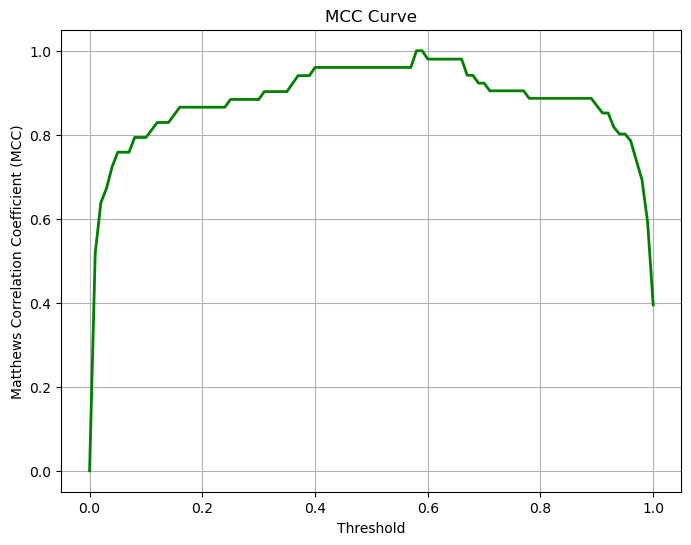

In [64]:
1
# Fit a RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_rf, y_train_rf)

# Predict probabilities for the positive class (heart disease = 1)
y_probs = rf_model.predict_proba(x_test_rf)[:, 1]  # probabilities for class 1 (heart disease)

# Compute MCC for different thresholds
mcc_values = []
thresholds = [i / 100 for i in range(101)]  # From 0.00 to 1.00 (100 thresholds)

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Compute MCC for this threshold
    mcc = matthews_corrcoef(y_test_rf, y_pred)
    mcc_values.append(mcc)

# Plot MCC curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, mcc_values, color='green', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Matthews Correlation Coefficient (MCC)')
plt.title('MCC Curve')
plt.grid(True)
plt.show()


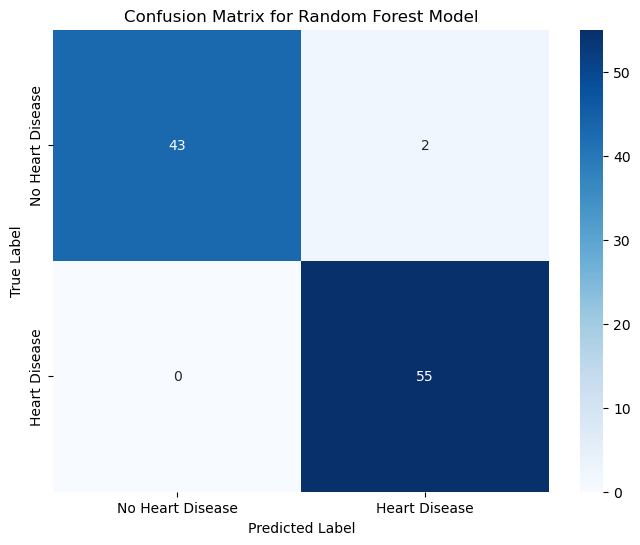

In [ ]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(x_test_rf)

# Calculate confusion matrix
cm = confusion_matrix(y_test_rf, y_pred_rf)

# Plot the confusion matrix using Seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


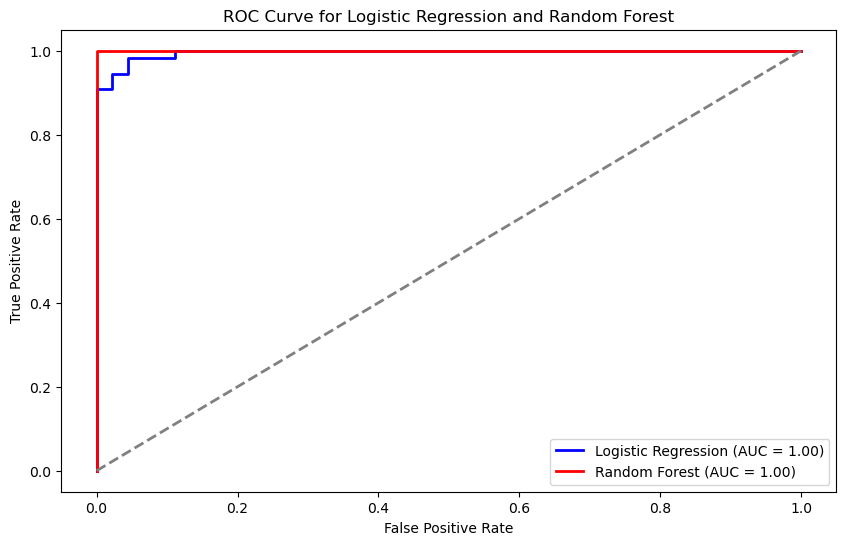

In [ ]:
# Predict probabilities for the positive class (heart disease = 1)
log_reg_probs = log_reg_model.predict_proba(x_test_log)[:, 1]  # For Logistic Regression
rf_probs = rf_model.predict_proba(x_test_rf)[:, 1]  # For Random Forest

# Compute ROC curve for Logistic Regression
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_log, log_reg_probs)
roc_auc_log = auc(fpr_log, tpr_log)

# Compute ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves for both models
plt.figure(figsize=(10, 6))

# Plot ROC curve for Logistic Regression
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)

# Plot ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Plot the diagonal line (representing a random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Adding labels and title
plt.title('ROC Curve for Logistic Regression and Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()
